In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import pycountry_convert as pc
import random
import geopandas as gpd 
from shapely.geometry import Point
import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.express as px

# Общее
Максимально использовать Pandas и Plotly или Bokeh или GeoPandas (для визуализации карты Мира со странами). Применение излишних циклов ведет к снижению баллов (циклы - ЗЛО). Применение ненужных функций - аналогично. Используйте apply, map и lambda по максимуму. Помним про корректное применение сортировок.

Вспоминаем английский:

csv_airports_v1.csv:
- `Airport ID`	Unique OpenFlights identifier for this airport.
- `Name of airport`. May or may not contain the City name.
- `City`	Main city served by airport. May be spelled differently from Name.
- `Country`	Country or territory where airport is located. See Countries to cross-reference to ISO 3166-1 codes.
- `IATA`	3-letter IATA code. Null if not assigned/unknown.
- `ICAO`	4-letter ICAO code. Null if not assigned.
- `Latitude`	Decimal degrees, usually to six significant digits. Negative is South, positive is North.
- `Longitude`	Decimal degrees, usually to six significant digits. Negative is West, positive is East.
- `Altitude`	In feet.
- `Timezone`	Hours offset from UTC. Fractional hours are expressed as decimals, eg. India is 5.5.
- `DST`	Daylight savings time. One of E (Europe), A (US/Canada), S (South America), O (Australia), Z (New Zealand), N (None) or U (Unknown). See also: Help: Time
- `Tz database timezone`	Timezone in "tz" (Olson) format, eg. "America/Los_Angeles".


csv_routes_v1.csv:
- `Airline`	2-letter (IATA) or 3-letter (ICAO) code of the airline.
- `Airline ID`	Unique OpenFlights identifier for airline (see Airline).
- `Source airport`	3-letter (IATA) or 4-letter (ICAO) code of the source airport.
- `Source airport ID`	Unique OpenFlights identifier for source airport (see Airport)
- `Destination airport`	3-letter (IATA) or 4-letter (ICAO) code of the destination airport.
- `Destination airport ID`	Unique OpenFlights identifier for destination airport (see Airport)
- `Equipment`	3-letter codes for plane type(s) generally used on this flight, separated by spaces

## Задание 1 
Скачать данные из `csv_airports_v1.csv` и `csv_routes_v1.csv` в виде датафрейма в переменные `airports` и `routes`.

In [2]:
airports = pd.read_csv('csv_airports_v1.csv')
routes = pd.read_csv('csv_routes_v1.csv')
display(airports.head(3), routes.head(3))

Airport ID               Name of airport         City           Country  \
0           2                Madang Airport       Madang  Papua New Guinea   
1           3  Mount Hagen Kagamuga Airport  Mount Hagen  Papua New Guinea   
2           4                Nadzab Airport       Nadzab  Papua New Guinea   

  IATA  ICAO  Latitude   Longitude  Altitude Timezone DST  \
0  MAG  AYMD -5.207080  145.789001        20       10   U   
1  HGU  AYMH -5.826790  144.296005      5388       10   U   
2  LAE  AYNZ -6.569803  146.725977       239       10   U   

   Tz database timezone  
0  Pacific/Port_Moresby  
1  Pacific/Port_Moresby  
2  Pacific/Port_Moresby

Airline Airline ID Source airport Source airport ID Destination airport  \
0      2B        410            ASF              2966                 KZN   
1      2B        410            ASF              2966                 MRV   
2      2B        410            CEK              2968                 KZN   

  Destination airport ID Equipment  
0                   2990       CR2  
1                   2962       CR2  
2                   2990       CR2

## Задание 2. 
1. Вывести `info` по датафреймам.
2. Обратите внимание, что в `csv_airports_v1.csv` пропущенные данные закодированы как `\N` заменить их на стандартные `np.nan`
3. Повторно посмотреть `info` по датафреймам.

In [3]:
print(airports.info(), routes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7697 entries, 0 to 7696
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Airport ID            7697 non-null   int64  
 1   Name of airport       7697 non-null   object 
 2   City                  7648 non-null   object 
 3   Country               7697 non-null   object 
 4   IATA                  7697 non-null   object 
 5   ICAO                  7697 non-null   object 
 6   Latitude              7697 non-null   float64
 7   Longitude             7697 non-null   float64
 8   Altitude              7697 non-null   int64  
 9   Timezone              7697 non-null   object 
 10  DST                   7697 non-null   object 
 11  Tz database timezone  7697 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 721.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67662 entries, 0 to 67661
Data columns (total 7 columns):
 #   Co

In [4]:
airports = airports.replace('\\N', np.nan) 

In [5]:
print(airports.info(), routes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7697 entries, 0 to 7696
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Airport ID            7697 non-null   int64  
 1   Name of airport       7697 non-null   object 
 2   City                  7648 non-null   object 
 3   Country               7697 non-null   object 
 4   IATA                  6071 non-null   object 
 5   ICAO                  7696 non-null   object 
 6   Latitude              7697 non-null   float64
 7   Longitude             7697 non-null   float64
 8   Altitude              7697 non-null   int64  
 9   Timezone              7344 non-null   object 
 10  DST                   7344 non-null   object 
 11  Tz database timezone  6676 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 721.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67662 entries, 0 to 67661
Data columns (total 7 columns):
 #   Co

## Задание 3. 
1. Срезать данные в `airports` по наличию кода `IATA` в переменую `iata_arports`, отвяжите новую табличку от `airports`
2. В `iata_arports` добавьте столбец `Continents` с названием континента, на котором размещен аэропорт (Северная и Южная Америка разные континенты, Россия в Европе, Турция в Азии). 

In [6]:
iata_arports = airports[airports['IATA'].notna()]
iata_arports['IATA'].isna().sum()#проверка

0

In [7]:
dict_cont = {"Cote d'Ivoire":'Africa', 'Congo (Brazzaville)':'Africa',
        'Congo (Kinshasa)':'Africa', 'Saint Helena':'Africa','Reunion':'Africa','Midway Islands': 'North America', 
        'Antarctica':'Antarctica', 'Virgin Islands':'North America','Burma':'Asia', 'East Timor':'Asia', 'Johnston Atoll':'Oceania', 
        'Western Sahara': 'Africa', 'Wake Island':'Oceania', 'Netherlands Antilles':'North America'}
def country_to_continent(country_name):
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
        return country_continent_name 
    except:
        return dict_cont[country_name]

In [8]:
iata_arports = iata_arports.copy()        
iata_arports['Continents'] = iata_arports['Country'].map(country_to_continent)
iata_arports.head(3)


Airport ID               Name of airport         City           Country  \
0           2                Madang Airport       Madang  Papua New Guinea   
1           3  Mount Hagen Kagamuga Airport  Mount Hagen  Papua New Guinea   
2           4                Nadzab Airport       Nadzab  Papua New Guinea   

  IATA  ICAO  Latitude   Longitude  Altitude Timezone DST  \
0  MAG  AYMD -5.207080  145.789001        20       10   U   
1  HGU  AYMH -5.826790  144.296005      5388       10   U   
2  LAE  AYNZ -6.569803  146.725977       239       10   U   

   Tz database timezone Continents  
0  Pacific/Port_Moresby    Oceania  
1  Pacific/Port_Moresby    Oceania  
2  Pacific/Port_Moresby    Oceania

## Задание 4.
Реализовать случайный выбор континента и на карте Мира нанести точки аэропортов `iata_arports` для выбранного континента.

Реализуйте все континенты на отдельных `subplots`.
Нашли обшибки в данных, если да то какие?

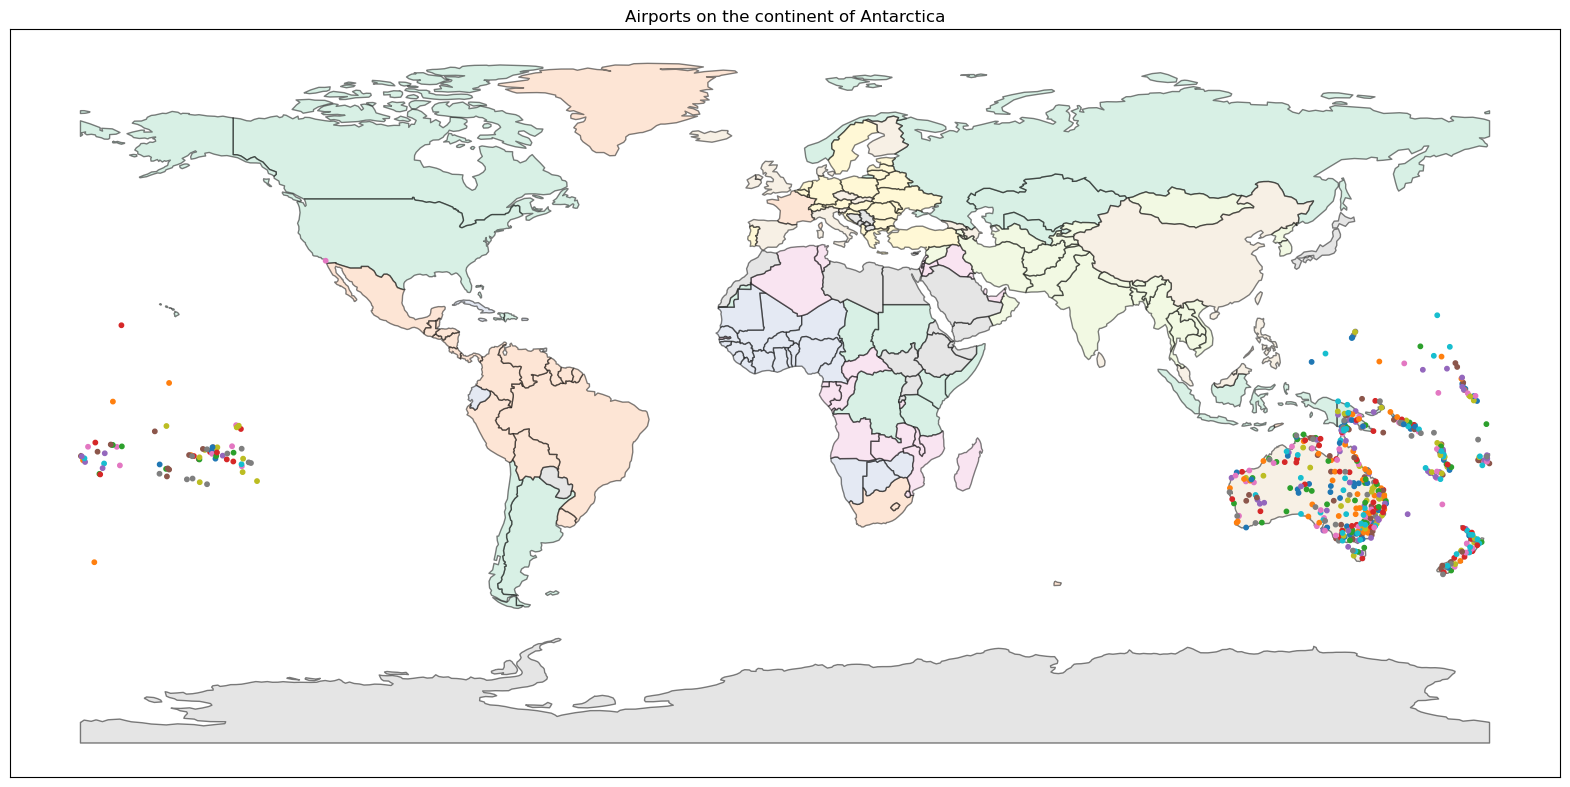

In [9]:
continents = iata_arports['Continents'].unique()
path_to_shapefile = "ne_110m_admin_0_countries.shp"
world = gpd.read_file(path_to_shapefile)
continent = world[world["CONTINENT"] == random.choice(continents)]
iata_arports['coordinates'] = iata_arports[['Longitude', 'Latitude']].values.tolist()
iata_arports['coordinates'] = iata_arports['coordinates'].apply(Point)
iata_arports= iata_arports[iata_arports['coordinates'].notna()]
iata_arports_1 = gpd.GeoDataFrame(iata_arports,geometry='coordinates')
air_cont = iata_arports_1[iata_arports_1['Continents'] == random.choice(continents)]
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()
ax_all = world.plot(ax=ax,cmap="Pastel2",edgecolor="black",alpha=0.5)
air_cont.plot(ax=ax_all, column = 'Name of airport',markersize=10,marker='o')
ax.set_xticks([])
ax.set_yticks([])
plt.title(f"Airports on the continent of {random.choice(continents)}")
plt.show()

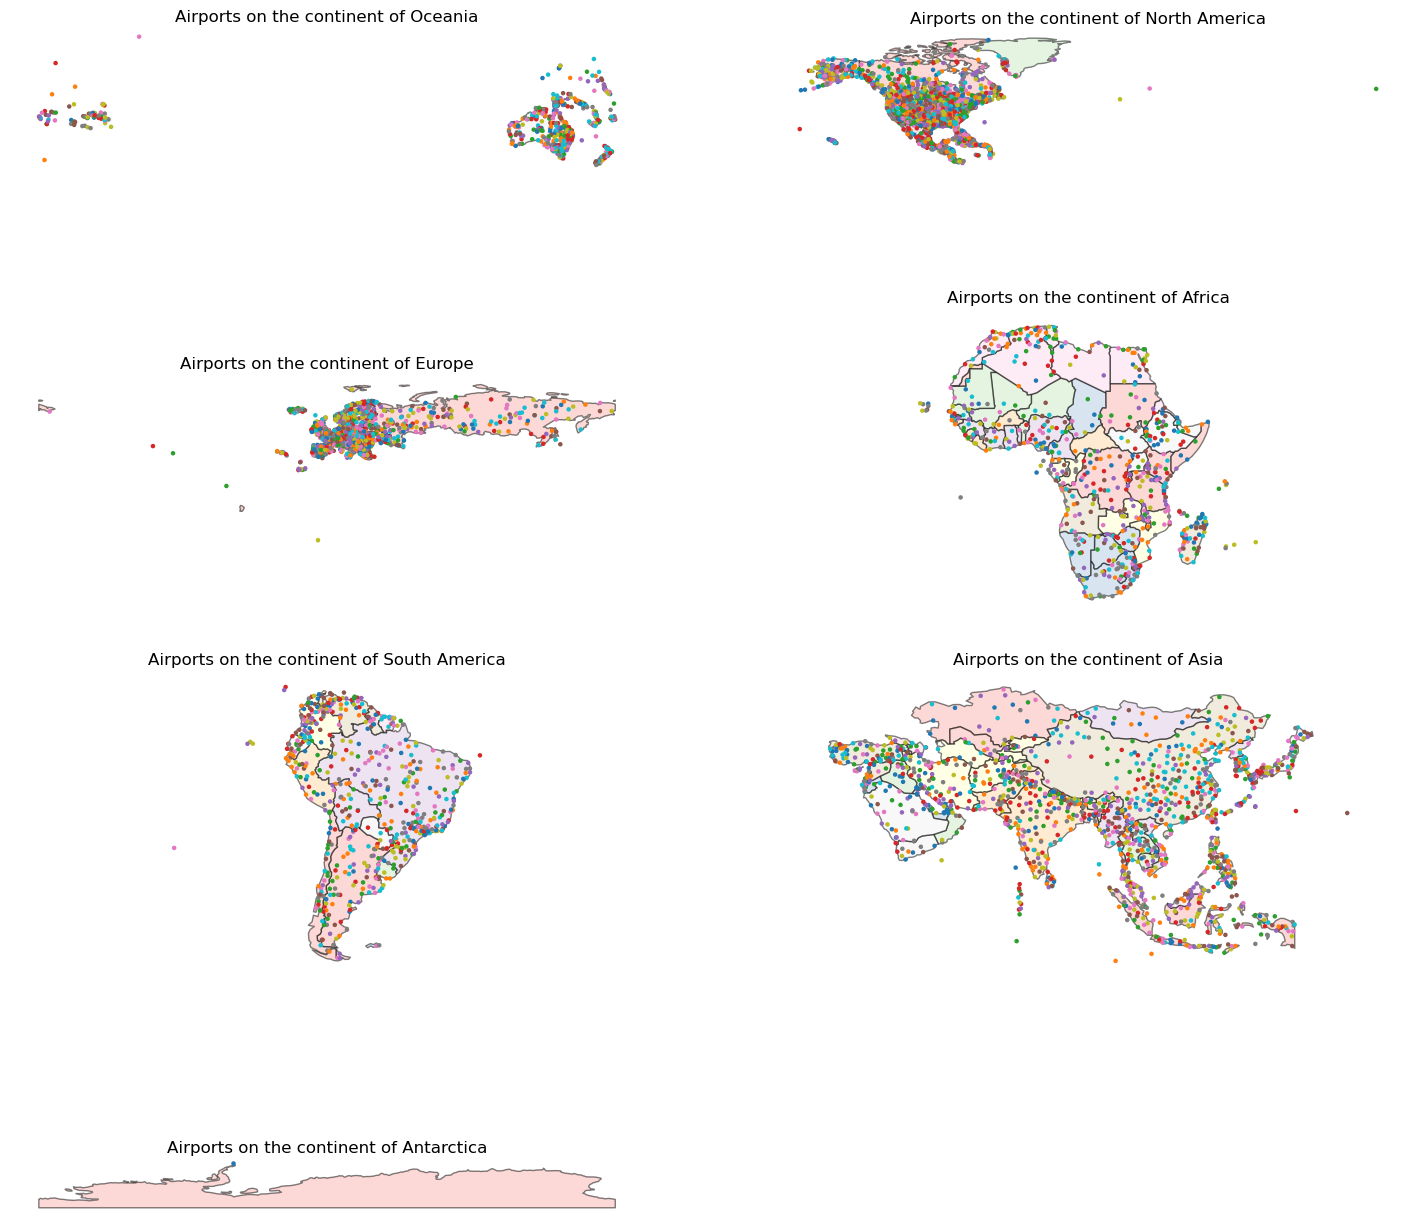

In [10]:
fig = plt.figure(figsize=(18, 18))
for i, continent_name in enumerate(continents):
    ax=fig.add_subplot(4,2,i + 1)
    continent = world[world["CONTINENT"] == continent_name]
    continent.plot(ax=ax, cmap="Pastel1", edgecolor="black",alpha=0.5)
    z = iata_arports_1[iata_arports_1['Continents'] == continent_name]
    z.plot(ax=ax, column = 'Name of airport',markersize=5,marker='o')
    ax.set_title(f"Airports on the continent of {continent_name}")
    ax.axis('off')
plt.show() 


Да, ошибки в данных присутствуют. Некоторые аэропорты относятся к неверным континентам. К примеру, военная авиабаза, "Taszár Air Base", расположенная близ деревни Тасар (Шомодь, Венгрия), относится к Северной Америке. Аналогично, аэропорт в Орле "Oryol Yuzhny".

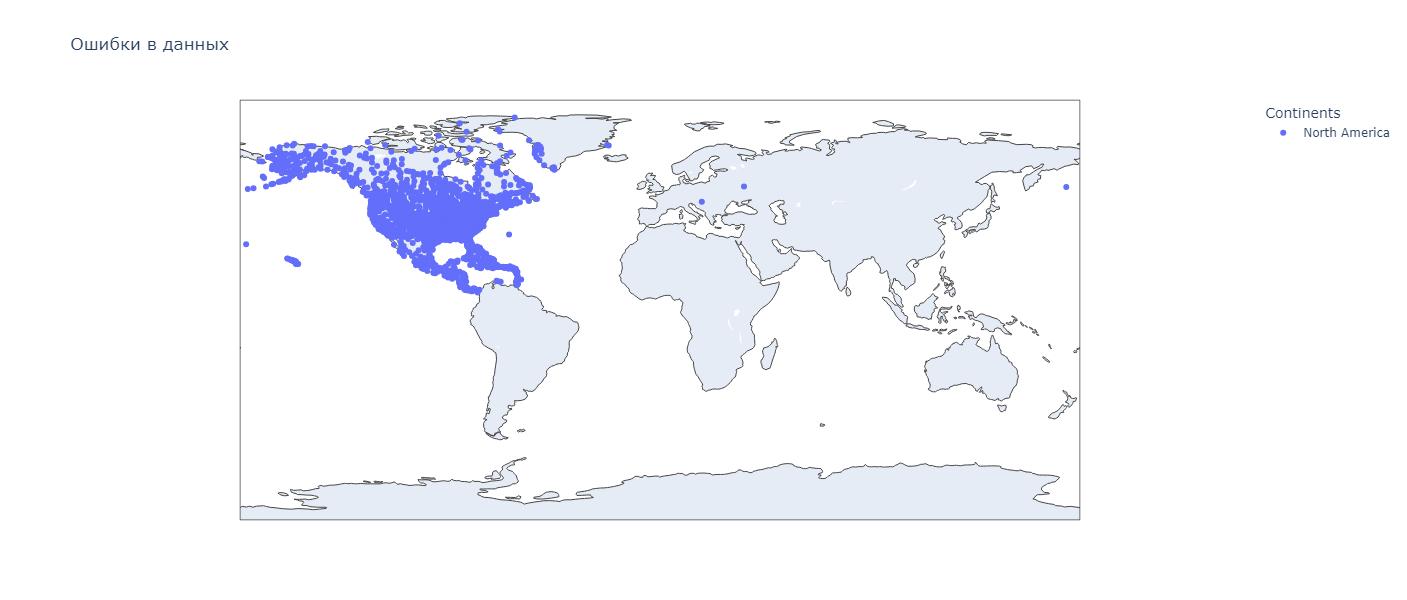

In [11]:
mistakes = iata_arports_1[iata_arports_1['Continents'] == 'North America']
fig = px.scatter_geo(mistakes,
                    lat=mistakes.coordinates.y,
                    lon=mistakes.coordinates.x,
                    hover_name="Name of airport", 
                    color = "Continents", title = 'Ошибки в данных', width = 1000, height = 600)
fig.show()

## Задание 5.
1. На основе таблиц `iata_arports` и `routes` рассчитать количество взлетов и посадок для каждой страны случайно выбранного континента собрать таблицу: индексы - страна, колонки - взеты и посадки. Упорядочить по названию страны.
2. Используя собранные данные - залить страны на карте континента по интенсивности взлет/посадок (сумма)(как пример https://plotly.com/python/mapbox-county-choropleth/).  Страна с отсутствующими данными имеет черный или белый цвет (как вам нравится).

In [12]:
new_df = pd.merge(iata_arports, routes, left_on = 'IATA', right_on = 'Source airport', how = 'left')
continents = iata_arports['Continents'].unique()
continent_name = random.choice(continents)
count_all = new_df[new_df['Country'].map(country_to_continent) == continent_name]
t_l_by_count = count_all.groupby('Country')[['Source airport', 'Destination airport']].count().sort_index()
t_l_by_count.columns = ['takeoffs', 'landings']
t_l_by_count.head()

takeoffs  landings
Country                                   
Albania                       36        36
Austria                      388       388
Belarus                       54        54
Belgium                      412       412
Bosnia and Herzegovina        23        23

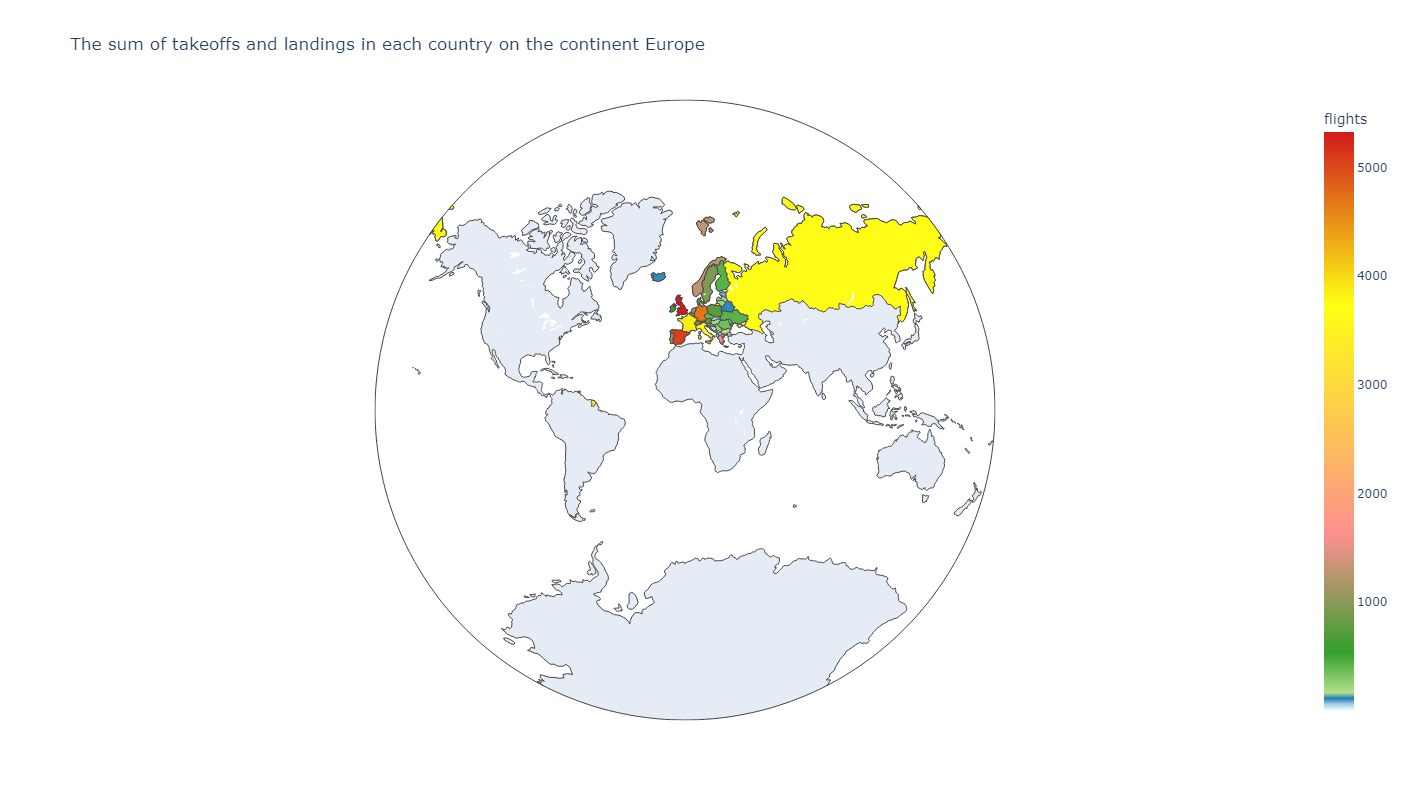

In [13]:
numb_flights = t_l_by_count.sum(axis = 'columns').reset_index()
numb_flights.columns = ['Country', 'flights']

data = dict(type='choropleth',
            locations=numb_flights['Country'],
            locationmode='country names',
            z=numb_flights['flights'],
            text = numb_flights['Country'],
            colorbar={'title': 'flights'},
            colorscale=[[0, 'rgb(225,255,255)'],
                        [0.01, 'rgb(166,206,227)'], [0.02, 'rgb(31,125,180)'],
                        [0.03, 'rgb(178,223,138)'], [0.10, 'rgb(51,160,44)'],
                        [0.30, 'rgb(251,144,143)'], [0.70, 'rgb(255,255,20)'],
                        [1, 'rgb(210,26,28)']],
            reversescale = False)

layout = dict(title= f"The sum of takeoffs and landings in each country on the continent {continent_name}",
              autosize=False,
              width=800,
              height=800,
              geo=dict(showframe=True, projection={'type': 'van der grinten'}))

choromap = go.Figure(data=[data], layout=layout)
iplot(choromap, validate=False)

## Задание 6.
Для каждого континента найти 10 самых крупных аэропортов. Результат в виде датафрейма. Иерархический индекс: 1 уровень континенты по алфавиту, 2 уровень название аэропорта. В столбцах страна, город, код IATA и количество взлет посадок. Внутри континента аэропорты упорядочены по взлет/посадкам от наибольшего к наимельшему.

Нанести на карту Мира данные аэропорты разным цветом в зависимости от континента.

In [14]:
def bigair10(group):
    return group.sort_values(by = 'flights', ascending = False)[:10]

In [15]:
new_df = pd.merge(iata_arports, routes, left_on = 'IATA', right_on = 'Source airport', how = 'left')
n_f = new_df.groupby(['Continents', 'Name of airport', 'Country', 'City','IATA'])[['Source airport', 'Destination airport']].count()
big_10_air = n_f.sum(axis = 'columns').reset_index()
big_10_air.columns = ['Continents','Name of airport', 'Country', 'City','IATA', 'flights']
big_10_air = big_10_air.groupby('Continents')[['Continents','Name of airport', 'Country', 'City','IATA', 'flights']].apply(bigair10).set_index(['Continents', 'Name of airport'])
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)#Чтобы увидеть Антарктиду в таблице
display(big_10_air)

Country  \
Continents    Name of airport                                                                           
Africa        OR Tambo International Airport                                             South Africa   
              Cairo International Airport                                                       Egypt   
              Jomo Kenyatta International Airport                                               Kenya   
              Mohammed V International Airport                                                Morocco   
              Addis Ababa Bole International Airport                                         Ethiopia   
              Houari Boumediene Airport                                                       Algeria   
              Tunis Carthage International Airport                                            Tunisia   
              Menara Airport                                                                  Morocco   
              Léopold Sédar Senghor International Airport                                     Senegal   
              Murtala Muhammed International Airport                                          Nigeria   
Antarctica    Teniente Rodolfo Marsh Martin Base                                           Antarctica   
Asia          Beijing Capital International Airport                                             China   
              Shanghai Pudong International Airport                                             China   
              Singapore Changi Airport                                                      Singapore   
              Incheon International Airport                                               South Korea   
              Istanbul Airport                                                                 Turkey   
              Dubai International Airport                                        United Arab Emirates   
              Hong Kong International Airport                                               Hong Kong   
              Guangzhou Baiyun International Airport                                            China   
              Suvarnabhumi Airport                                                           Thailand   
              Chengdu Shuangliu International Airport                                           China   
Europe        London Heathrow Airport                                                  United Kingdom   
              Charles de Gaulle International Airport                                          France   
              Frankfurt am Main Airport                                                       Germany   
              Amsterdam Airport Schiphol                                                  Netherlands   
              Barcelona International Airport                                                   Spain   
              Munich Airport                                                                  Germany   
              London Gatwick Airport                                                   United Kingdom   
              Leonardo da Vinci–Fiumicino Airport                                               Italy   
              Adolfo Suárez Madrid–Barajas Airport                                              Spain   
              Domodedovo International Airport                                                 Russia   
North America Hartsfield Jackson Atlanta International Airport                          United States   
              Chicago O'Hare International Airport                                      United States   
              Los Angeles International Airport                                         United States   
              Dallas Fort Worth International Airport                                   United States   
              John F Kennedy International Airport                                      United States   
              Miami International Airport                                               United States   

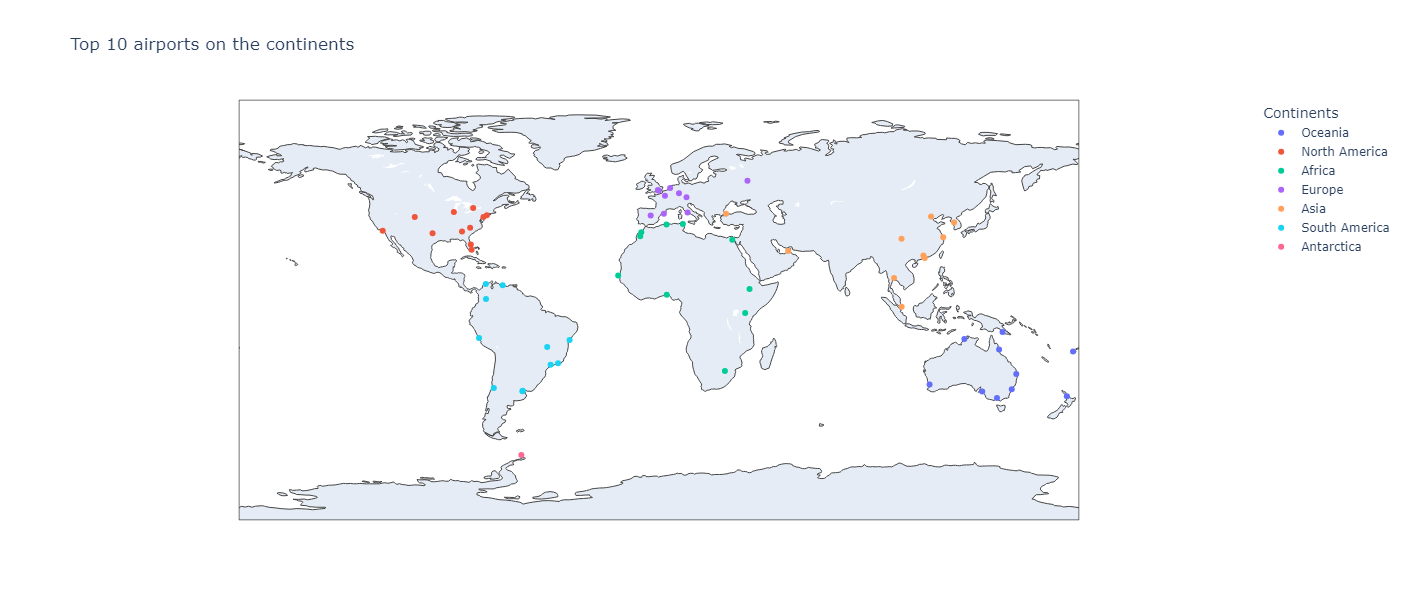

In [16]:
names = big_10_air.index.levels[1].unique()
air_map = iata_arports[iata_arports['Name of airport'].isin(names)]
air_map = gpd.GeoDataFrame(air_map,geometry='coordinates')
fig = px.scatter_geo(air_map,
                    lat=air_map.coordinates.y,
                    lon=air_map.coordinates.x,
                    hover_name="Name of airport", 
                    color = "Continents", title = 'Top 10 airports on the continents', width = 1000, height = 600)
fig.show()
